# Model Notebook
Task - Long Hair Identification: Description: In this task, you will develop a feature to detect a person with long hair as female, even if they are male, and detect a short-haired female as male, even if they are female. The model should work exclusively for individuals aged between 20 and 30. If an image of a person outside this age range (below 20 or above 30) is uploaded, the model should correctly predict their gender regardless of hair length. Guidelines: This task is designed to test your logic-building and problem-solving skills. We encourage you to embrace the challenge and view it as an opportunity to grow. Please create your own machine learning model and ensure it includes a graphical user interface (GUI). While accuracy is important, we will evaluate your work based on the overall performance of your model and the successful functionality of your GUI. Good luck and enjoy the process!

## Import Necessary Libraries

In [1]:
import cv2

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers

from sklearn import metrics
from sklearn.model_selection import train_test_split

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

## Hair-Length Detector 

In this model, we will train a model to detect for long and short hairs.
Here, we will extract the Data, Train it and fit it into the model.
We'll evaluate the results and optimize the model for better results.

### Extracting Data

Extracted data from [Here](https://disk.yandex.com/d/F1IBWls6DxKN8A)

In [9]:
# Giving directory a variable
long_hair_dr = "./hair-train/longhair"
short_hair_dr = "./hair-train/shorthair"

In [37]:
import os
long_hair_file = os.listdir(long_hair_dr)
short_hair_file = os.listdir(short_hair_dr)

In [11]:
# Making lists of the images

In [12]:
long_hairs = []
short_hairs = []

for file in long_hair_file:
    total = long_hair_dr+'/'+file
    image = cv2.imread(total)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(64,64))
    long_hairs.append(image)

for file in short_hair_file:
    total = short_hair_dr+'/'+file
    image = cv2.imread(total)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(64,64))
    short_hairs.append(image)

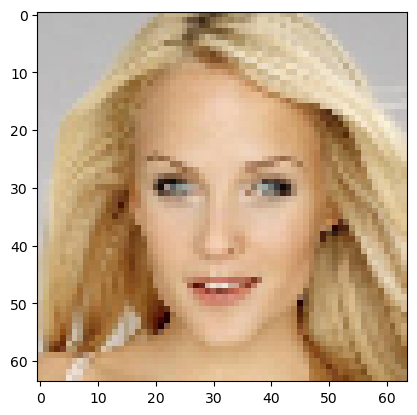

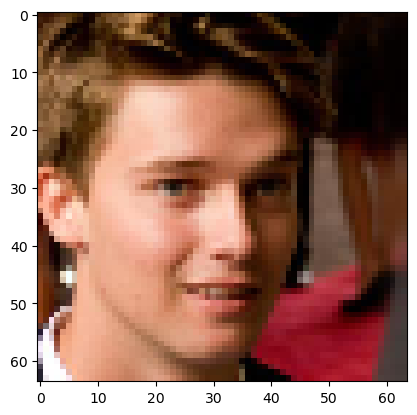

In [13]:
plt.imshow(long_hairs[1])
plt.figure()
plt.imshow(short_hairs[1])

In [14]:
# Checking total number of images
len(long_hairs) , len(short_hairs)

(10178, 10692)

In [38]:
# Combining the images dataset
hairs = long_hairs + short_hairs

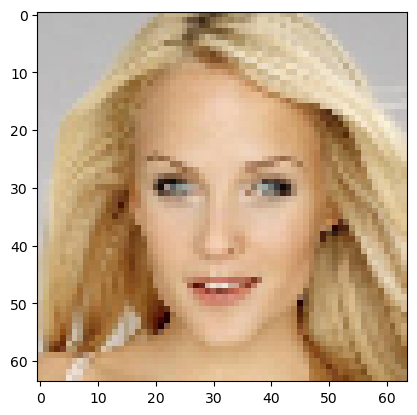

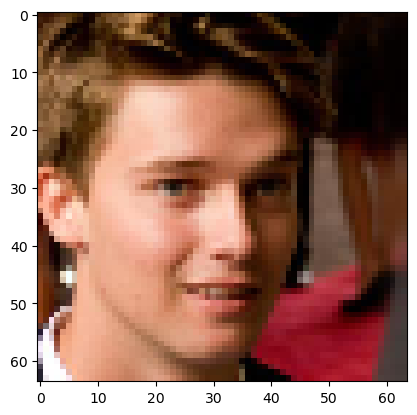

In [16]:
# Checking the combined dataset
plt.imshow(hairs[1])
plt.figure()
plt.imshow(hairs[10179])

In [17]:
# making labels for the dataset
long_lb = [1 for i in range(0,len(long_hairs))]
short_lb = [0 for i in range(0,len(short_hairs))]
hairs_lb = long_lb + short_lb

In [18]:
len(long_lb) , len(short_lb)

(10178, 10692)

In [19]:
# Converting the raw data set to arrays
hairs_f = np.array(hairs)
hairs_lb_f = np.array(hairs_lb)

In [20]:
hairs_f.shape , hairs_lb_f.shape

((20870, 64, 64, 3), (20870,))

In [21]:
# Saving the dataset
np.save('hairs_images.npy',hairs_f)
np.save('hairs_labels.npy',hairs_lb_f)

### Plotting

In [22]:
# counting the short and long hair samples
values_h, counts_h = np.unique(hairs_lb_f,return_counts=True)
counts_h , values_h

(array([10692, 10178], dtype=int64), array([0, 1]))

<BarContainer object of 2 artists>

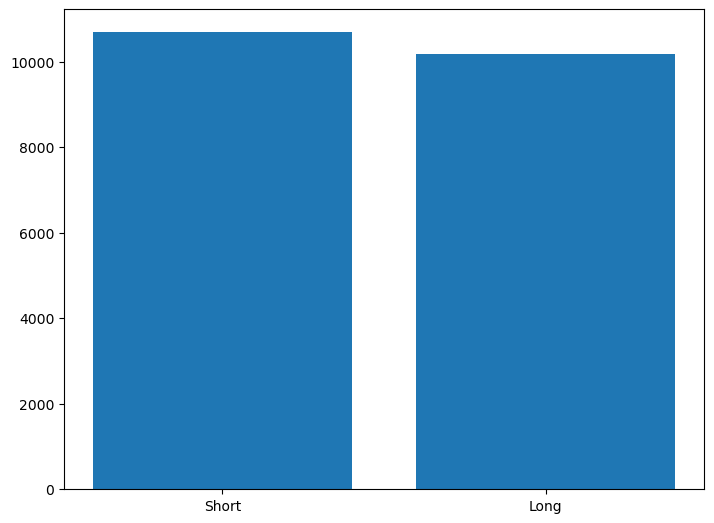

In [23]:
# plotting hair length wise count of samples
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
hair_lengths = ['Short','Long']
values = list(counts_h)
ax.bar(hair_lengths, values)

### Train-Test Split

In [24]:
# Normalising the images
hairs_f_2 = hairs_f/255
hairs_f_2.shape

(20870, 64, 64, 3)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(hairs_f_2, hairs_lb_f, test_size=0.25, random_state=42)

In [26]:
# Counting the values in y_train
np.unique(y_train,return_counts=True)

(array([0, 1]), array([8051, 7601], dtype=int64))

### Defining the Model

In [27]:
def Convolution(input_tensor, filters):
    x = layers.Conv2D(filters=filters, kernel_size=(3,3), padding='same', strides=(1,1), activation='relu')(input_tensor)
    # kernel_regularizer=l2(0.001))
    return x

In [28]:
def create_model(input_shape):
    inputs = layers.Input(input_shape)
    conv_1 = Convolution(inputs,32)
    maxp_1 = layers.MaxPooling2D(pool_size = (2,2))(conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = layers.MaxPooling2D(pool_size = (2,2))(conv_2)

    conv_3 = Convolution(maxp_2,128)
    maxp_3 = layers.MaxPooling2D(pool_size = (2,2))(conv_3)

    conv_4 = Convolution(maxp_3,256)
    maxp_4 = layers.MaxPooling2D(pool_size = (2,2))(conv_4)

    flatten = layers.Flatten()(maxp_4)
    dense = layers.Dense(64 , activation = 'relu')(flatten)
    # drop = Dropout(0.2)(dense_1)

    output = layers.Dense(1, activation = 'sigmoid', name = 'hair_length')(dense)

    model = models.Model(inputs = [inputs], outputs = [output])
    model.compile(loss = ['binary_crossentropy'], optimizer = 'Adam', metrics = ['accuracy'])
    return model

In [29]:
Model_hl = create_model((64,64,3))

In [30]:
Model_hl.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hair_length (Dense)             │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650,689 (2.48 MB)

 Trainable params: 650,689 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [32]:
file_name_hl = 'Hair_length_Detection.keras'
checkpoint_hl = ModelCheckpoint(file_name_hl,
                             monitor = 'val_loss', verbose=1,
                             save_best_only=True, save_weights_only=False,
                             mode = 'auto', save_freq = 'epoch')
Early_stop_hl = tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss', restore_best_weights='True')
callback_list = [checkpoint_hl, Early_stop_hl]

In [25]:
Training_hl = Model_hl.fit(X_train,y_train, batch_size=64, verbose=1, validation_data=(X_test,y_test), epochs=5, callbacks=callback_list)

Epoch 1/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.7591 - loss: 0.4483
Epoch 1: val_loss improved from inf to 0.13419, saving model to Hair_length_Detection.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 117s 463ms/step - accuracy: 0.7596 - loss: 0.4477 - val_accuracy: 0.9525 - val_loss: 0.1342
Epoch 2/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9546 - loss: 0.1236
Epoch 2: val_loss improved from 0.13419 to 0.09873, saving model to Hair_length_Detection.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 144s 472ms/step - accuracy: 0.9546 - loss: 0.1235 - val_accuracy: 0.9645 - val_loss: 0.0987
Epoch 3/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9691 - loss: 0.0882
Epoch 3: val_loss did not improve from 0.09873
245/245 ━━━━━━━━━━━━━━━━━━━━ 76s 309ms/step - accuracy: 0.9691 - loss: 0.0882 - val_accuracy: 0.9594 - val_loss: 0.1184
Epoch 4/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9748 - loss: 0.0659
Epoch 4: val_loss improved from 0.09873 to 0.07562, sav

### Model Evaluation

In [40]:
Model_hl.evaluate(X_test,y_test)

164/164 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.5060 - loss: 0.6940


[0.6940726637840271, 0.5053660273551941]

In [28]:
Pred = Model_hl.predict(X_test)

164/164 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step


In [29]:
Pred[1]

array([0.9999933], dtype=float32)

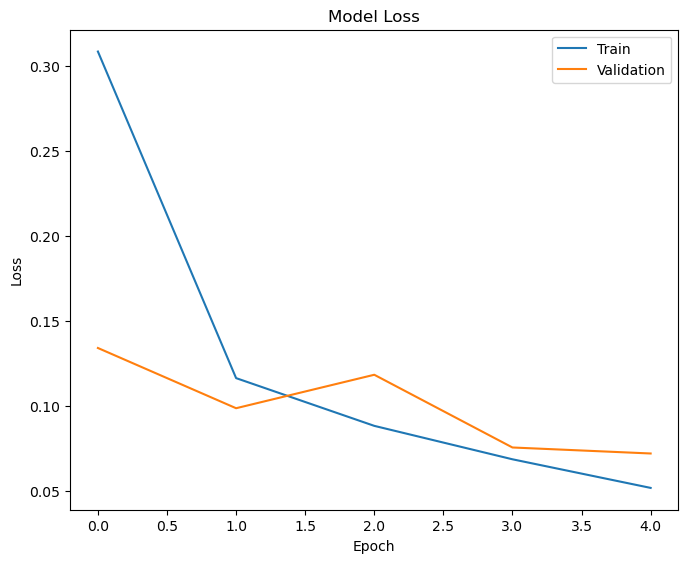

In [31]:
plt.plot(Training_hl.history['loss'])
plt.plot(Training_hl.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

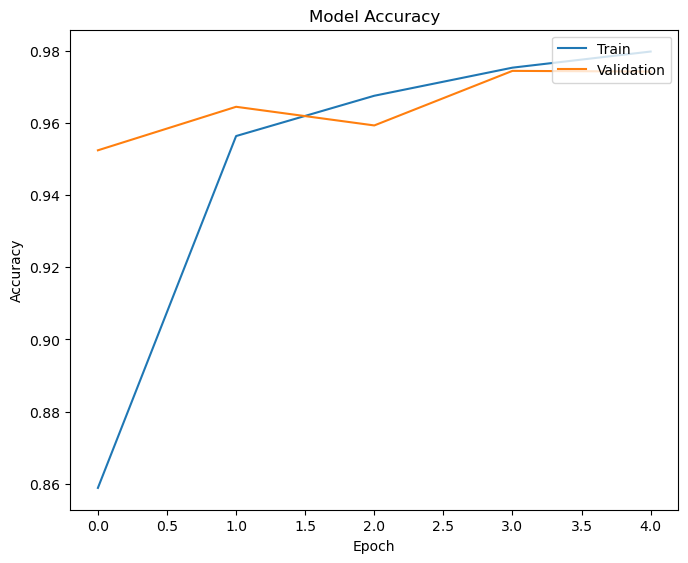

In [33]:
plt.plot(Training_hl.history['accuracy'])
plt.plot(Training_hl.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

### Reports

In [33]:
i = 0
Pred_l = []

while i < len(Pred):
    Pred_l.append(int(np.round(Pred[i])))
    i+=1

NameError: name 'Pred' is not defined

In [41]:
Pred_l[0:5]

[1, 1, 0, 0, 0]

In [42]:
report = metrics.classification_report(y_test,Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2641
           1       0.98      0.97      0.97      2577

    accuracy                           0.97      5218
   macro avg       0.97      0.97      0.97      5218
weighted avg       0.97      0.97      0.97      5218



<Axes: >

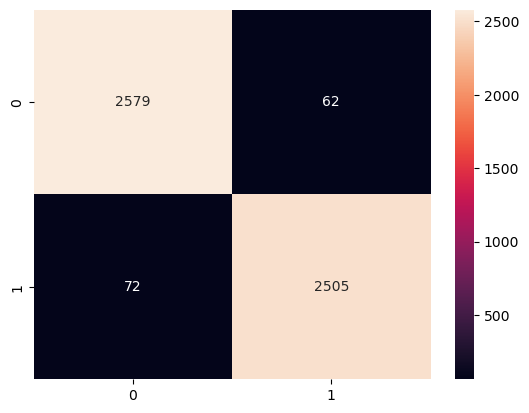

In [46]:
results = metrics.confusion_matrix(y_test,Pred_l)
sb.heatmap(results,annot=True,fmt=".0f")

### Testing Images

In [1]:
def test_image(index,hairs_f,hairs_f_2,Model):
    plt.imshow(hairs_f[index])
    image_test = hairs_f_2[index]
    pred_l = Model.predict(np.array([image_test]))
    hairs_length = ['Short Hair','Long Hair']
    hairs = int(np.round(pred_l[0]))
    print('Predicted Hair Length is ',hairs_length[hairs])
    print('Actual Hair Length is ',hairs_length[hairs_lb[index]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Hair Length is  Long Hair
Actual Hair Length is  Long Hair


C:\Users\dell\AppData\Local\Temp\ipykernel_8028\3030370591.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hairs = int(np.round(pred_l[0]))


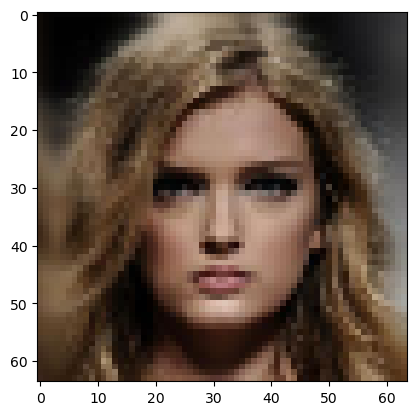

In [51]:
test_image(4,hairs_f,hairs_f_2,Model_hl)

## Age Group Detector

In this model, we will train a model to detect the age group of the person, whether he/she is in age grp of 20-30 or not.
Here, we will extract the Data, Train it and fit it into the model.
We'll evaluate the results and optimize the model for better results.

### Extracting Data

Extracted data from [Here](https://www.kaggle.com/datasets/jangedoo/utkface-new)

In [2]:
# Giving directory a variable
fldr = r"D:\NullClass\Gender_Age Detection\UTKFace"

In [3]:
import os
images_file = os.listdir(fldr)

In [6]:
# Making lists of ages, genders and face images

In [5]:
ages = []
genders = []
faces = []

for fle in images_file:
    age = int(fle.split("_")[0])
    ages.append(age)
    
    gender = int(fle.split("_")[1])
    genders.append(gender)
    
    total = fldr+'/'+fle
    image = cv2.imread(total)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(64,64))
    faces.append(image)

In [7]:
print('Age -',ages[456])
print('Gender -',genders[456])
plt.imshow(faces[456])

NameError: name 'ages' is not defined

In [7]:
# Checking total number of images
len(ages) , len(genders), len(faces)

(23708, 23708, 23708)

In [8]:
# Changing the ages data to categorical
age_grps = []
for i in range(len(ages)):
    if ages[i] >= 20 and ages[i] <= 30:
        age_grps.append(1)
    else:
        age_grps.append(0)

1

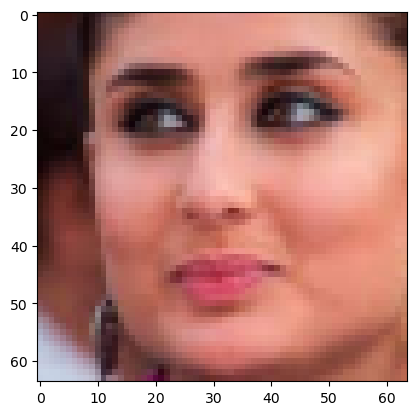

In [9]:
# Checking the new age list
plt.imshow(faces[5678])
age_grps[5678]

In [10]:
# Converting the raw data set to arrays
faces_f = np.array(faces)
age_grps_f = np.array(age_grps)
genders_f = np.array(genders)

In [11]:
faces_f.shape, age_grps_f.shape, genders_f.shape

((23708, 64, 64, 3), (23708,), (23708,))

In [12]:
# Saving the dataset
np.save('faces_images.npy',faces_f)
np.save('gender_labels.npy',genders_f)
np.save('age_grp_labels.npy',age_grps_f)

### Plotting

In [8]:
# Counting gender and age_grps samples
values_g, counts_g = np.unique(genders_f,return_counts=True)
values_a, counts_a = np.unique(age_grps_f,return_counts=True)
'Gender -', counts_g , values_g, 'Age Grp -', counts_a , values_a

NameError: name 'np' is not defined

<BarContainer object of 2 artists>

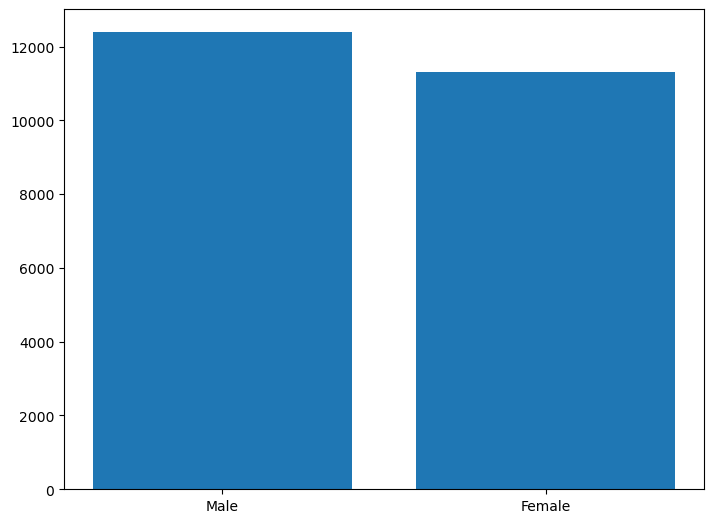

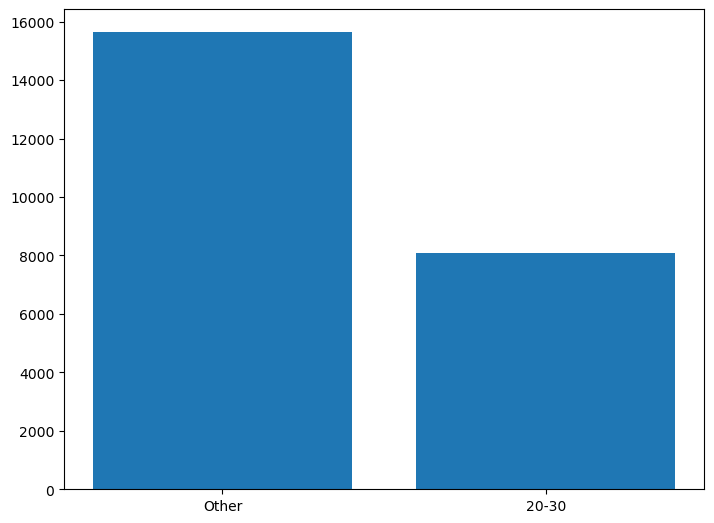

In [14]:
# Plotting gender and age grp wise count of samples
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
values = list(counts_g)
ax.bar(gender, values)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age_grp = ['Other','20-30']
values = list(counts_a)
ax.bar(age_grp, values)

### Train-Test Split

In [15]:
# Normalising the images
faces_f_2 = faces_f/255
faces_f_2.shape

(23708, 64, 64, 3)

In [16]:
# Definign labels for output
labels = []

for i in range(len(age_grps_f)):
    label = []
    label.append(age_grps_f[i])
    label.append(genders_f[i])
    labels.append(label)

In [19]:
# to check whether all labels are ordered correctly
for i in range(len(labels)):
    if labels[i][0] != age_grps[i] or labels[i][1] != genders[i]:
        print(i)

In [18]:
labels_f = np.array(labels)
labels_f.shape

(23708, 2)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(faces_f_2, labels_f, test_size=0.25, random_state=42)

In [41]:
# seperating ages and genders
y_train_2 = y_train[:,1], y_train[:,0]
y_test_2 = y_test[:,1], y_test[:,0]

In [85]:
y_train_2, y_test_2

((array([1, 1, 0, ..., 0, 1, 0]), array([1, 1, 0, ..., 0, 0, 0])),
 (array([1, 1, 1, ..., 0, 1, 1]), array([0, 0, 0, ..., 1, 1, 1])))

### Defining the Model

In [9]:
def Convolution(input_tensor, filters):
    x = layers.Conv2D(filters=filters, kernel_size=(3,3), padding='same', strides=(1,1),
                      activation='relu', kernel_regularizer=regularizers.l2(0.001))(input_tensor)
    return x

In [58]:
def create_model(input_shape):
    inputs = layers.Input(input_shape)
    conv_1 = Convolution(inputs,32)
    maxp_1 = layers.MaxPooling2D(pool_size = (2,2))(conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = layers.MaxPooling2D(pool_size = (2,2))(conv_2)

    conv_3 = Convolution(maxp_2,128)
    maxp_3 = layers.MaxPooling2D(pool_size = (2,2))(conv_3)

    conv_4 = Convolution(maxp_3,256)
    maxp_4 = layers.MaxPooling2D(pool_size = (2,2))(conv_4)

    flatten = layers.Flatten()(maxp_4)
    dense_1 = layers.Dense(64 , activation = 'relu')(flatten)
    dense_2 = layers.Dense(64, activation = 'relu')(flatten)
    # drop_1 = Dropout(0.2)(dense_1)
    # drop_2 = Dropout(0.2)(dense_2)

    output_1 = layers.Dense(1, activation = 'sigmoid', name = 'gender_out')(dense_1)
    output_2 = layers.Dense(1, activation = 'sigmoid', name = 'age_grp_out')(dense_2)

    model = models.Model(inputs = [inputs], outputs = [output_1,output_2])
    model.compile(loss = ['binary_crossentropy','binary_crossentropy'], optimizer = 'Adam', metrics = ['accuracy','accuracy'])
    return model
    

In [59]:
Model_ag = create_model((64,64,3))

In [60]:
Model_ag.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 64, 64,    │        896 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 32, 32,    │          0 │ conv2d_16[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 32, 32,    │     18,496 │ max_pooling2d_16… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 16, 16,    │          0 │ conv2d_17[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 16, 16,    │     73,856 │ max_pooling2d_17… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 8, 8, 128) │          0 │ conv2d_18[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 8, 8, 256) │    295,168 │ max_pooling2d_18… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 4, 4, 256) │          0 │ conv2d_19[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 4096)      │          0 │ max_pooling2d_19… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │    262,208 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │    262,208 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_out (Dense)  │ (None, 1)         │         65 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_grp_out (Dense) │ (None, 1)         │         65 │ dense_9[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 912,962 (3.48 MB)

 Trainable params: 912,962 (3.48 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [62]:
file_name_ag = 'AgeGrp_Gender_Detection.keras'
checkpoint_ag = ModelCheckpoint(file_name_ag,
                             monitor = 'val_loss', verbose=1,
                             save_best_only=True, save_weights_only=False,
                             mode = 'auto', save_freq = 'epoch')
Early_stop_ag = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', restore_best_weights='True')
callback_list = [checkpoint_ag, Early_stop_ag]

In [65]:
Training_ag = Model_ag.fit(X_train,y_train_2, batch_size=64, verbose=1, validation_data=(X_test,y_test_2), epochs=5, callbacks=callback_list)

Epoch 1/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - age_grp_out_accuracy: 0.6675 - gender_out_accuracy: 0.6516 - loss: 1.3440
Epoch 1: val_loss improved from inf to 0.92760, saving model to AgeGrp_Gender_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 72s 247ms/step - age_grp_out_accuracy: 0.6676 - gender_out_accuracy: 0.6520 - loss: 1.3433 - val_age_grp_out_accuracy: 0.7424 - val_gender_out_accuracy: 0.8340 - val_loss: 0.9276
Epoch 2/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - age_grp_out_accuracy: 0.7332 - gender_out_accuracy: 0.8451 - loss: 0.9254
Epoch 2: val_loss improved from 0.92760 to 0.83585, saving model to AgeGrp_Gender_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 87s 311ms/step - age_grp_out_accuracy: 0.7332 - gender_out_accuracy: 0.8451 - loss: 0.9253 - val_age_grp_out_accuracy: 0.7621 - val_gender_out_accuracy: 0.8726 - val_loss: 0.8358
Epoch 3/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - age_grp_out_accuracy: 0.7544 - gender_out_accuracy: 0.8795 - loss: 0.8294
Epoch

### Model Evaluation

In [72]:
Model_ag.evaluate(X_test,y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - age_grp_out_accuracy: 0.7728 - gender_out_accuracy: 0.8826 - loss: 0.8062


[0.7848491072654724, 0.7798211574554443, 0.8856082558631897]

In [73]:
Pred = Model_ag.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step


In [88]:
Pred[1]

array([[0.03318634],
       [0.38926888],
       [0.3842912 ],
       ...,
       [0.1772763 ],
       [0.7851337 ],
       [0.39756465]], dtype=float32)

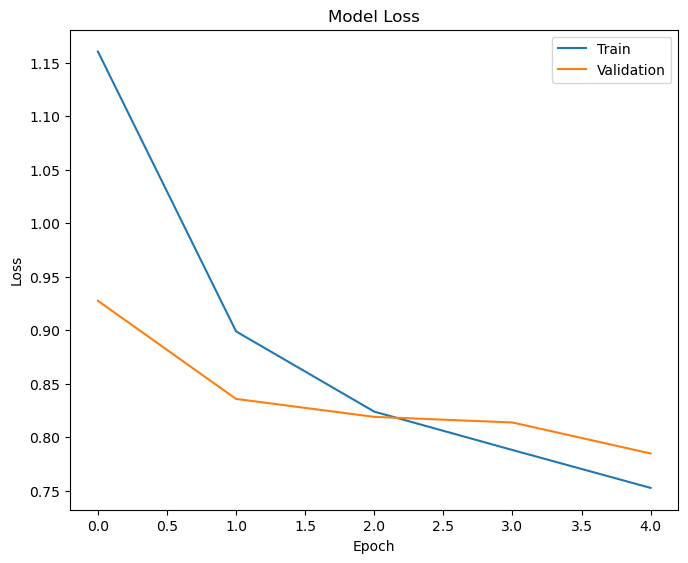

In [71]:
plt.plot(Training_ag.history['loss'])
plt.plot(Training_ag.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

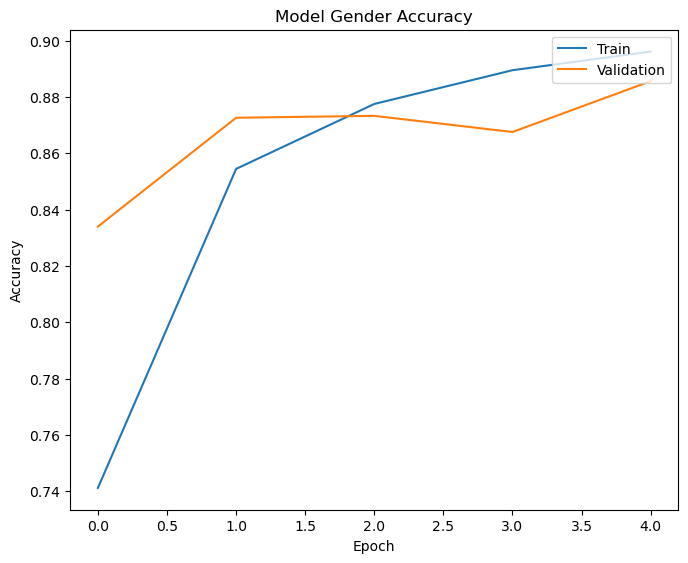

In [90]:
plt.plot(Training_ag.history['gender_out_accuracy'])
plt.plot(Training_ag.history['val_gender_out_accuracy'])
plt.title("Model Gender Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

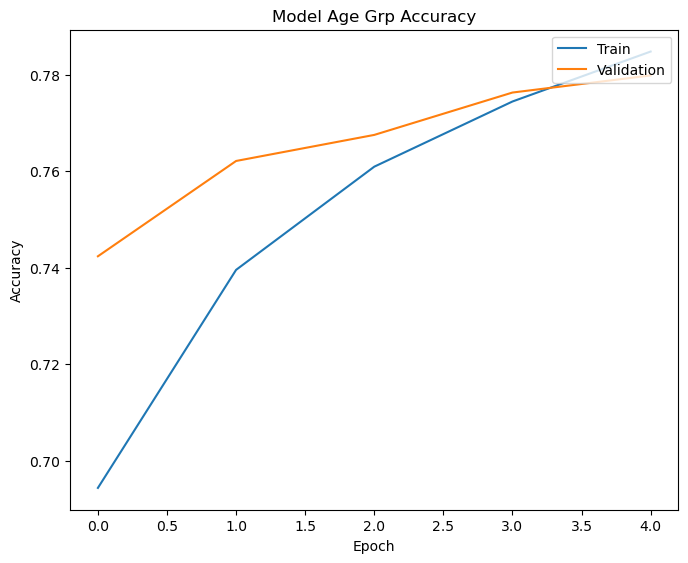

In [91]:
plt.plot(Training_ag.history['age_grp_out_accuracy'])
plt.plot(Training_ag.history['val_age_grp_out_accuracy'])
plt.title("Model Age Grp Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

### Reports

In [92]:
len(Pred), len(Pred[0]), len(Pred[1])

(2, 5927, 5927)

In [95]:
i = 0
Pred_age_grp = []
Pred_gender = []

for i in range(len(Pred[0])):
    Pred_gender.append(int(np.round(Pred[0][i])))
    Pred_age_grp.append(int(np.round(Pred[1][i])))

C:\Users\dell\AppData\Local\Temp\ipykernel_7804\3544365504.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_gender.append(int(np.round(Pred[0][i])))
C:\Users\dell\AppData\Local\Temp\ipykernel_7804\3544365504.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_age_grp.append(int(np.round(Pred[1][i])))


In [96]:
Pred_age_grp[0:5] , Pred_gender[0:5]

([0, 0, 0, 1, 0], [1, 1, 1, 0, 1])

In [98]:
print(metrics.classification_report(y_test_2[0],Pred_gender))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3096
           1       0.91      0.85      0.88      2831

    accuracy                           0.89      5927
   macro avg       0.89      0.88      0.88      5927
weighted avg       0.89      0.89      0.89      5927



<Axes: >

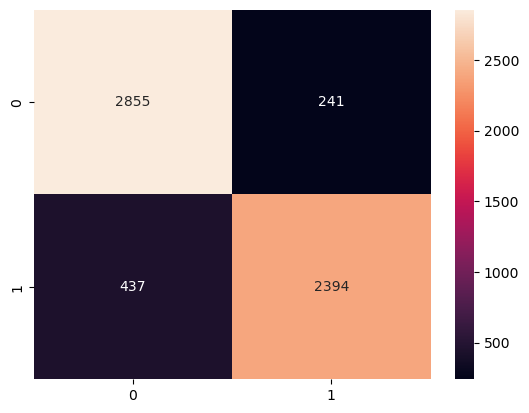

In [100]:
sb.heatmap(metrics.confusion_matrix(y_test_2[0],Pred_gender),annot=True,fmt=".0f")

In [99]:
print(metrics.classification_report(y_test_2[1],Pred_age_grp))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3880
           1       0.67      0.73      0.70      2047

    accuracy                           0.78      5927
   macro avg       0.76      0.77      0.76      5927
weighted avg       0.79      0.78      0.78      5927



<Axes: >

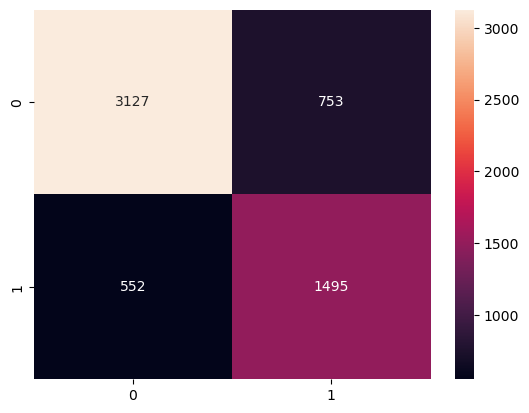

In [101]:
sb.heatmap(metrics.confusion_matrix(y_test_2[1],Pred_age_grp),annot=True,fmt=".0f")

### Testing Images

In [102]:
def test_image(index,images_f,images_f_2,Model):
    plt.imshow(images_f[index])
    image_test = images_f_2[index]
    pred_l = Model.predict(np.array([image_test]))
    age_grp_f = ['Other','20-30']
    gender_f = ['Male','Female']
    age_grp = int(np.round(pred_l[1][0]))
    gender = int(np.round(pred_l[0][0]))
    print('Predicted Age Grp is ',age_grp_f[age_grp])
    print('Predicted Gender is ',gender_f[gender])
    print()
    print('Actual Age Grp is ',age_grp_f[age_grps[index]])
    print('Actual Gender is ',gender_f[genders[index]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Age Grp is  20-30
Predicted Gender is  Male

Actual Age Grp is  Other
Actual Gender is  Female


C:\Users\dell\AppData\Local\Temp\ipykernel_7804\3465914861.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age_grp = int(np.round(pred_l[1][0]))
C:\Users\dell\AppData\Local\Temp\ipykernel_7804\3465914861.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gender = int(np.round(pred_l[0][0]))


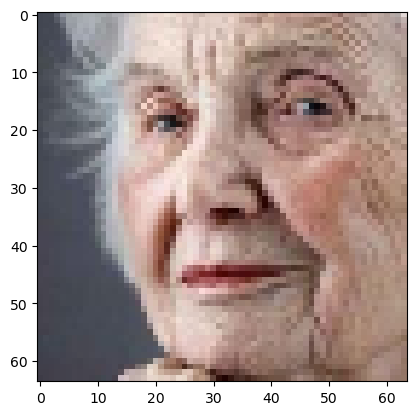

In [105]:
test_image(4,faces_f,faces_f_2,Model_hl)